# Assignment 1 objective: we need to investigate the possible relationships between the loyalty points, age, remuneration, and spending scores. Note that you will use this data set in future modules as well and it is, therefore, strongly encouraged to first clean the data as per provided guidelines and then save a copy of the clean data for future use.

In [1]:
# Import the relevant libraries to perform Linear Regression 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


In [2]:
# Load the turtle_reviews.csv file into a new DataFrame called 'reviews'
reviews = pd.read_csv('turtle_reviews.csv')

# Print the first few rows of the DataFrame
print(reviews.head())

   gender  age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
0    Male   18              12.30                      39             210   
1    Male   23              12.30                      81             524   
2  Female   22              13.12                       6              40   
3  Female   25              13.12                      77             562   
4  Female   33              13.94                      40             366   

  education language platform  product  \
0  graduate       EN      Web      453   
1  graduate       EN      Web      466   
2  graduate       EN      Web      254   
3  graduate       EN      Web      263   
4  graduate       EN      Web      291   

                                              review  \
0  When it comes to a DM's screen, the space on t...   
1  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2  Nice art, nice printing.  Why two panels are f...   
3  Amazing buy! Bought it as a gift for our new d...   
4  A

In [3]:
# Check the data types and metadata of the DataFrame
print(reviews.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   language                2000 non-null   object 
 7   platform                2000 non-null   object 
 8   product                 2000 non-null   int64  
 9   review                  2000 non-null   object 
 10  summary                 2000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 172.0+ KB
None


In [4]:
# Check for missing values
print(reviews.isnull().sum())

gender                    0
age                       0
remuneration (k£)         0
spending_score (1-100)    0
loyalty_points            0
education                 0
language                  0
platform                  0
product                   0
review                    0
summary                   0
dtype: int64


In [5]:
# There are no missing values, we may proceed

In [6]:
# Create a summary of the descriptive statistics of the DataFrame
print(reviews.describe())

               age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
count  2000.000000        2000.000000             2000.000000     2000.000000   
mean     39.495000          48.079060               50.000000     1578.032000   
std      13.573212          23.123984               26.094702     1283.239705   
min      17.000000          12.300000                1.000000       25.000000   
25%      29.000000          30.340000               32.000000      772.000000   
50%      38.000000          47.150000               50.000000     1276.000000   
75%      49.000000          63.960000               73.000000     1751.250000   
max      72.000000         112.340000               99.000000     6847.000000   

            product  
count   2000.000000  
mean    4320.521500  
std     3148.938839  
min      107.000000  
25%     1589.250000  
50%     3624.000000  
75%     6654.000000  
max    11086.000000  


Analysis of the summary statistics


Age - The average age is 39.5, the oldest age is 72 while the youngest is 17. The standard devation is 13.6, indicating a large spread across customer age. 


Wage - Average wage of 48K, with a standard deviation of 23K, again there is a large spread of income across the customer base. 


Spending score and loyalty points also show a large deviation indicating a wide range of spending habits and loyalty points. 

In [7]:
# Remove the "language" and "platform" columns from the DataFrame
reviews = reviews.drop(['language', 'platform'], axis=1)

# Print the updated DataFrame to verify the columns were removed
print(reviews.head())


   gender  age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
0    Male   18              12.30                      39             210   
1    Male   23              12.30                      81             524   
2  Female   22              13.12                       6              40   
3  Female   25              13.12                      77             562   
4  Female   33              13.94                      40             366   

  education  product                                             review  \
0  graduate      453  When it comes to a DM's screen, the space on t...   
1  graduate      466  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2  graduate      254  Nice art, nice printing.  Why two panels are f...   
3  graduate      263  Amazing buy! Bought it as a gift for our new d...   
4  graduate      291  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this sp

In [8]:
# Rename the "remuneration" and "spending_score" columns to more user-friendly names
reviews = reviews.rename(columns={'remuneration (k£)': 'wage(k£)', 'spending_score (1-100)': 'spending'})

# Print the updated DataFrame to verify the columns were renamed
print(reviews.head())



   gender  age  wage(k£)  spending  loyalty_points education  product  \
0    Male   18     12.30        39             210  graduate      453   
1    Male   23     12.30        81             524  graduate      466   
2  Female   22     13.12         6              40  graduate      254   
3  Female   25     13.12        77             562  graduate      263   
4  Female   33     13.94        40             366  graduate      291   

                                              review  \
0  When it comes to a DM's screen, the space on t...   
1  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2  Nice art, nice printing.  Why two panels are f...   
3  Amazing buy! Bought it as a gift for our new d...   
4  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless  
3   

In [9]:
# Save the clean reviews DataFrame as a CSV file
reviews.to_csv('clean_reviews.csv', index=False)

# Read in the CSV file and sense-check the DataFrame
clean_reviews = pd.read_csv('clean_reviews.csv')

# Print the shape of the DataFrame
print(clean_reviews.shape)



(2000, 9)


In [10]:
# Print the metadata of the DataFrame
print(clean_reviews.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          2000 non-null   object 
 1   age             2000 non-null   int64  
 2   wage(k£)        2000 non-null   float64
 3   spending        2000 non-null   int64  
 4   loyalty_points  2000 non-null   int64  
 5   education       2000 non-null   object 
 6   product         2000 non-null   int64  
 7   review          2000 non-null   object 
 8   summary         2000 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 140.8+ KB
None


In [11]:
# The file is now clean and we can begin the process of using regression to evaluate the relationship between the variables 

In [12]:
# First I will visualise the relationship between each independent variable and the depedent 

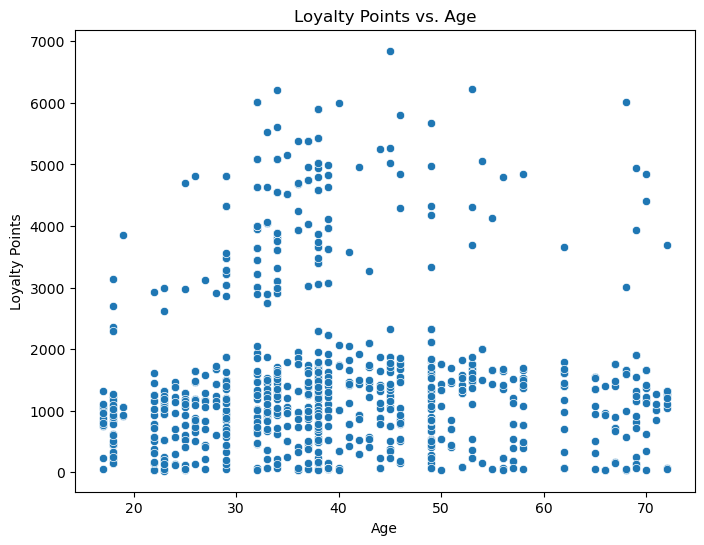

In [13]:
# Scatterplot of loyalty points vs. age
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='loyalty_points', data=clean_reviews)
plt.xlabel('Age')
plt.ylabel('Loyalty Points')
plt.title('Loyalty Points vs. Age')
plt.show()

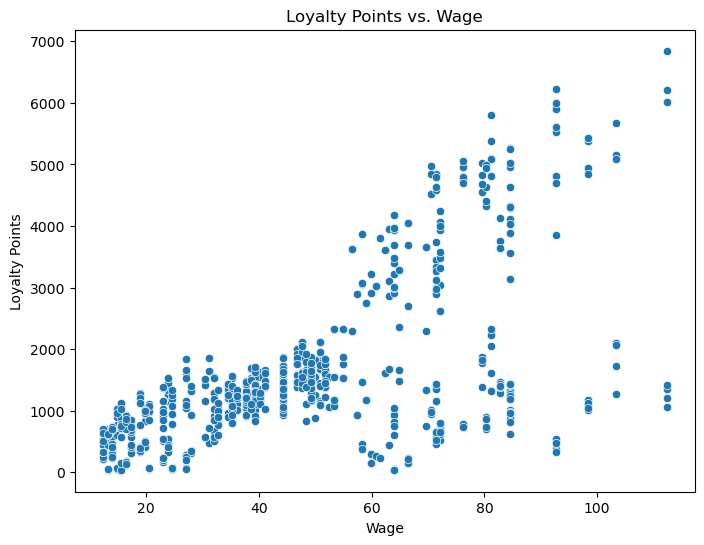

In [14]:
# Scatterplot of loyalty points vs. wage
plt.figure(figsize=(8, 6))
sns.scatterplot(x='wage(k£)', y='loyalty_points', data=clean_reviews)
plt.xlabel('Wage')
plt.ylabel('Loyalty Points')
plt.title('Loyalty Points vs. Wage')
plt.show()

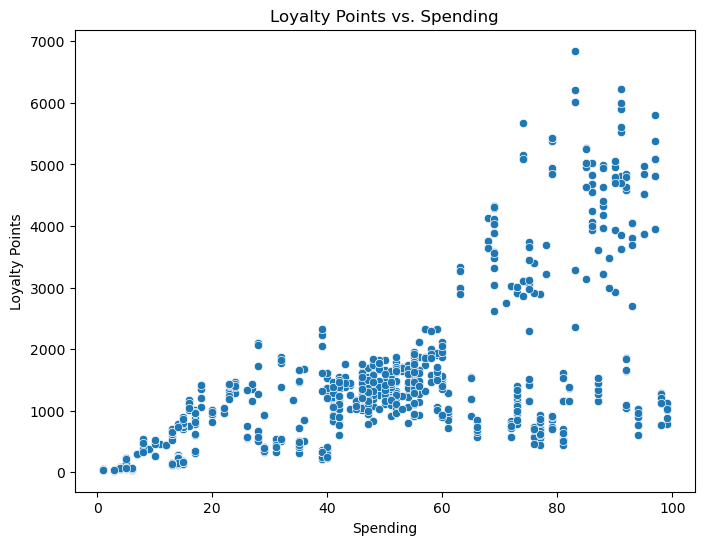

In [15]:
# Scatterplot of loyalty points vs. spending
plt.figure(figsize=(8, 6))
sns.scatterplot(x='spending', y='loyalty_points', data=clean_reviews)
plt.xlabel('Spending')
plt.ylabel('Loyalty Points')
plt.title('Loyalty Points vs. Spending')
plt.show()

In [16]:
# Calculate the correlation coefficients between the variablesm to determine the relationship between these variables and the dependent variable.
correlations = clean_reviews[['age', 'wage(k£)', 'spending', 'loyalty_points']].corr()

# Print the correlation matrix
print(correlations)


                     age  wage(k£)  spending  loyalty_points
age             1.000000 -0.005708 -0.224334       -0.042445
wage(k£)       -0.005708  1.000000  0.005612        0.616065
spending       -0.224334  0.005612  1.000000        0.672310
loyalty_points -0.042445  0.616065  0.672310        1.000000


Analysis - Age does not seem to be a significant factor in determining loyalty points as the coefficent is close to 0. However, wage and spending had much greater scores which indicates that they have positive relationships with loyalty points. 

In [17]:
# Create the multiple linear regression model 

import statsmodels.api as sm

# Specify the independent and dependent variables
X = reviews[['age', 'wage(k£)', 'spending']]
y = reviews['loyalty_points']

# Add a constant term to the independent variables
X = sm.add_constant(X)

# Create the OLS model
model = sm.OLS(y, X).fit()

# Extract the estimated parameters, standard errors, and predicted values
params = model.params
std_errs = model.bse
predictions = model.predict(X)

# Print the regression table
print(model.summary())




                            OLS Regression Results                            
Dep. Variable:         loyalty_points   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     3491.
Date:                Mon, 24 Apr 2023   Prob (F-statistic):               0.00
Time:                        13:57:07   Log-Likelihood:                -15320.
No. Observations:                2000   AIC:                         3.065e+04
Df Residuals:                    1996   BIC:                         3.067e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2203.0598     52.361    -42.075      0.0

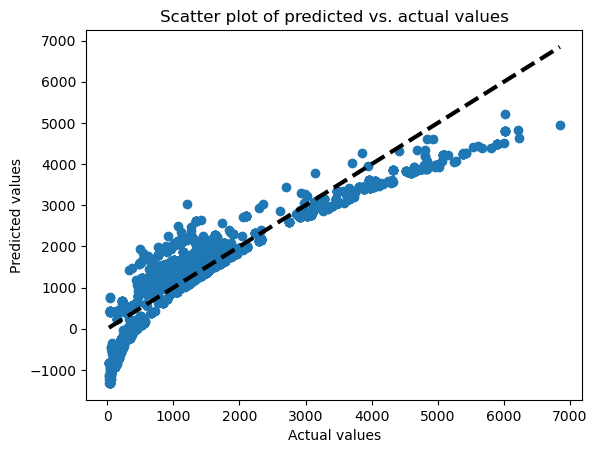

In [18]:
# Plot the linear regression and add a regression line.


fig, ax = plt.subplots()

# Scatter plot of the data
ax.scatter(y, predictions)

# Add regression line
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=3)
ax.set_xlabel('Actual values')
ax.set_ylabel('Predicted values')
ax.set_title('Scatter plot of predicted vs. actual values')
plt.show()

# Summarise any insights you've discovered

The R-Squared Value of 0.84 indicates that 84% of the variance of the loyalty points can be explained by age, wage and spending scores. The coefficent estimate indicates that a +1 increase in age is linked with an increase of ~ 11 loyalty points. Meanwhile, a +1 increase in wage is linked with ~ 34 increase in loyalty points. Similarily, a 1 unit increase in spending score is linked with +34 loyalty points. Therefore, wage and spending score are the two largest factors in increasing loyalty score. While the correlation analysis revealed a weak relationship between age and loyalty_points, the multiple regression analysis showed that age has a positive effect on loyalty_points when accounting for the combined effect of all variables. The F statistic is high which there is a strong relationship between the independent (predictor) and dependent variables (response). Additionally, the prob value of 0 means that we can reject the null hypothesis that there is no relationship between the independent and dependent variables. 

# Explain what I have learned relates to the business objective 

We have generated insight in how customers accumulate loyalty points. Wage and spending score are the largest factors in determing loyalty points. Age was also significant but not as strong as the other two variables. Therefore, Turtle Games could target high-wage and high-spending customers, as this demographic is more likely to accumulate loyalty points and contribute to overall sales performance.

#  Assignment 2 

## Objective - Use k-means clustering to identify the optimal number of clusters and then apply and plot the data using the created segments.

In [19]:
#Import the necessary libraries for Clusturing 


from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score


In [20]:
# Load the data
data = pd.read_csv('clean_reviews.csv')

In [21]:


# Create a new DataFrame with wage and spending columns
df2 = data[['wage(k£)', 'spending']].copy()

# Display the first few rows
print(df2.head())

   wage(k£)  spending
0     12.30        39
1     12.30        81
2     13.12         6
3     13.12        77
4     13.94        40


In [22]:
# Explore Data 
# Display the data types and number of non-null values in each column
print(df2.info())

# Display the summary statistics for the DataFrame
print(df2.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   wage(k£)  2000 non-null   float64
 1   spending  2000 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 31.4 KB
None
          wage(k£)     spending
count  2000.000000  2000.000000
mean     48.079060    50.000000
std      23.123984    26.094702
min      12.300000     1.000000
25%      30.340000    32.000000
50%      47.150000    50.000000
75%      63.960000    73.000000
max     112.340000    99.000000


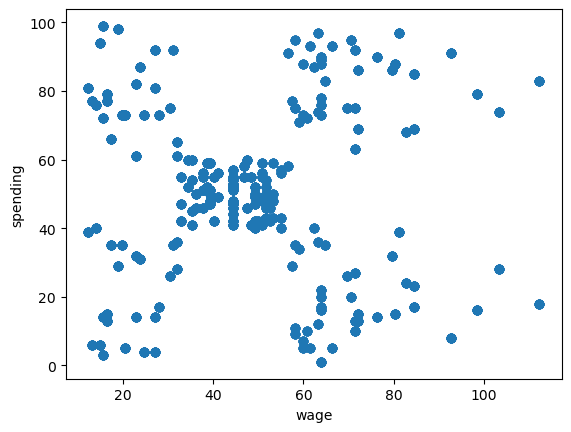

In [23]:
# Plot the data to determine the relationship and clusters 

plt.scatter(df2['wage(k£)'], df2['spending'])
plt.xlabel('wage')
plt.ylabel('spending')
plt.show()

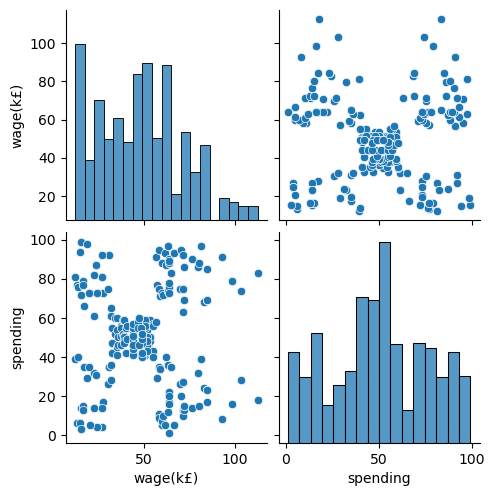

In [24]:
# Create a pairplot
sns.pairplot(df2)
plt.show()

In [25]:
# Determine the optimal number of clusters using the Elbow method
wcss = []  # Within-Cluster-Sum-of-Squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df2)
    wcss.append(kmeans.inertia_)

C:\Users\aadam\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(


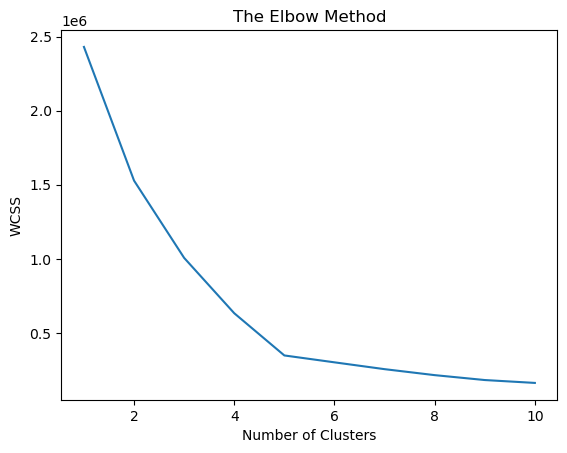

In [26]:
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

The Elbow point is at 5 clusters - Therefore this value is the optimal number of clusters 


In [27]:
# Determine the optimal number of clusters using the Silhouette method
silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df2)
    cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(df2, cluster_labels)
    silhouette_scores.append(silhouette_avg)

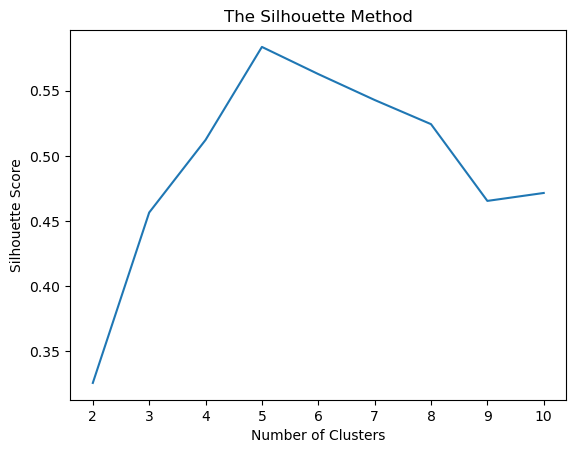

In [28]:
plt.plot(range(2, 11), silhouette_scores)
plt.title('The Silhouette Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

The higest silhouette score is at 5 clusters, this number has the best balance. Furthermore, it is the same value that was generated from the Elbow method 


In [29]:
## Evaluate the usefulness of at least three values for *k* based on insights from the Elbow and Silhouette methods. 
## Lets use the values 3, 4 ,5, 6 

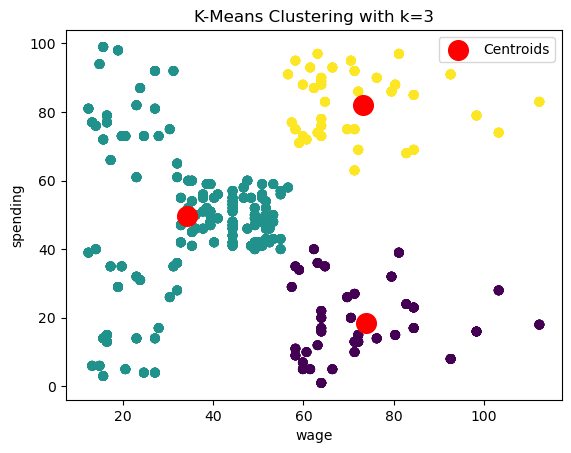

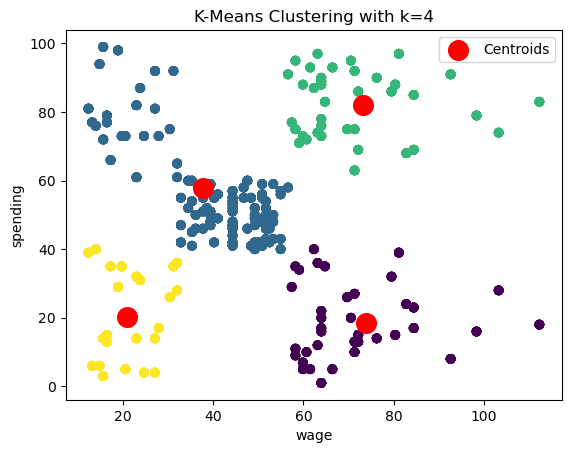

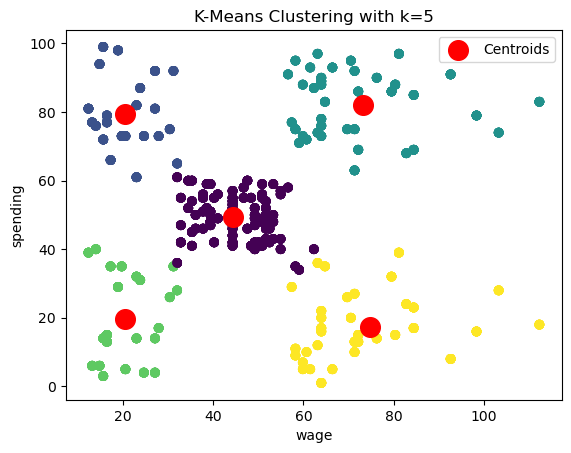

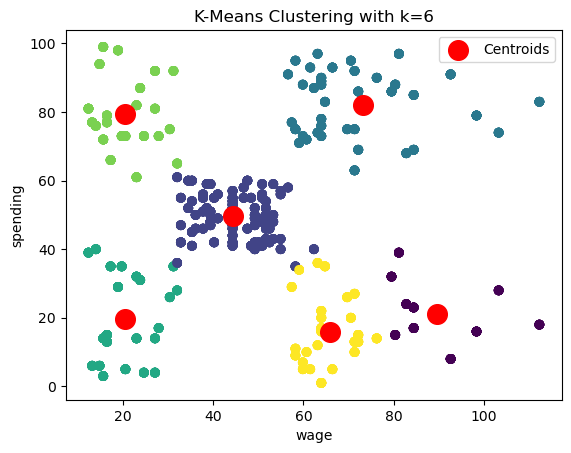

In [30]:
def plot_kmeans_clusters(k, data):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(data)
    labels = kmeans.labels_
    
    plt.scatter(data['wage(k£)'], data['spending'], c=labels, cmap='viridis')
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', label='Centroids')
    plt.xlabel('wage')
    plt.ylabel('spending')
    plt.title(f'K-Means Clustering with k={k}')
    plt.legend()
    plt.show()

# Plot k-means clustering for k=3, k=4, and k=5
plot_kmeans_clusters(3, df2)
plot_kmeans_clusters(4, df2)
plot_kmeans_clusters(5, df2)
plot_kmeans_clusters(6, df2)


Clearly, 5 clusters are the most optimal here as the clusters are most clearly seperated from one another, they are also densely packed and well placed in the clusters. In K=6 the centroids are too close together. 

In [31]:
# Create a final model using your selected K means value 




# Fit the final k-means model with k=5
k = 5
kmeans_final = KMeans(n_clusters=k, init='k-means++', random_state=42)
kmeans_final.fit(df2)

# Obtain the predicted cluster labels
predicted_labels = kmeans_final.labels_

# Count the number of observations per predicted class
unique_labels, counts = np.unique(predicted_labels, return_counts=True)
class_counts = dict(zip(unique_labels, counts))

# Print the results
print(f"Number of observations per predicted class (k={k}):")
for cluster, count in class_counts.items():
    print(f"Cluster {cluster}: {count}")


Number of observations per predicted class (k=5):
Cluster 0: 774
Cluster 1: 269
Cluster 2: 356
Cluster 3: 271
Cluster 4: 330


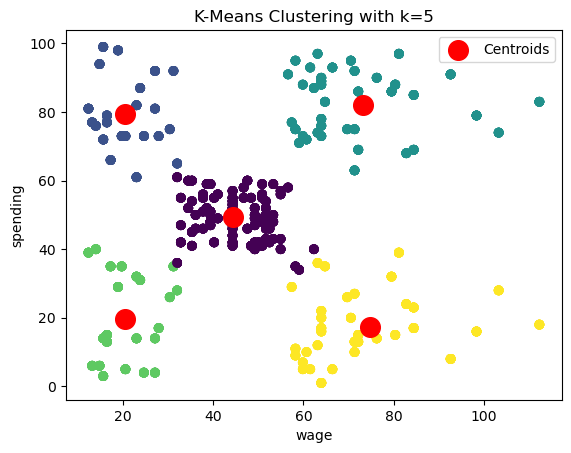

In [32]:
# Plot the k-means clustering for k=5 again for visibility 
plt.scatter(df2['wage(k£)'], df2['spending'], c=predicted_labels, cmap='viridis')
plt.scatter(kmeans_final.cluster_centers_[:, 0], kmeans_final.cluster_centers_[:, 1], s=200, c='red', label='Centroids')
plt.xlabel('wage')
plt.ylabel('spending')
plt.title(f'K-Means Clustering with k={k}')
plt.legend()
plt.show()


The clusters are clearly seperated from each other therefore indicating 5 distinct groups. The clusters are also densley packed and the centroids are near the centre of the clusters, therefore showing the similarity of the clusters. These are the five groups. 1) Low wage, high spend, 2) low wage, low spend, 3) moderate wage, moderate spend, 4) High wage low spend, 5) High wage high spend. 

# How what I have learned relates to the business objective 

From the cluster analysis, we have created five distinct customer group that the marketing team can target. Here are some marketing activities that the marketing team may target each of these groups. 

Low Spend, low income group - Focus on value for money- offering services such as EA Play, a low cost monthly memembership which allows users to access a large library of games. We could also offer monthly, interest free payments for premium games.

High spend, low income group - This group is clearly dedicated to the services that we provide. Again, we can offer value for money products and membership and payment options. We could also reward their loyalty by providing exclusive content such as ingame items or beta testing oppurtunities. 

Moderate spend, moderate income - This depends on the buisness strategy. To maintain this cluster, we should provide a mixture of quality and price to satisfy their current spending habits. However, the business may wish to increase their spending and thus they should increasingly advertise only premium content to this demographic. **Potentially interesting converation about clusturing here, could we have gone with 4 instead of 5 clusters? I don't personally think so as there is just too much spread but its worth considering and discussing in the report**. 

Low Spend, high income - A potential profitable venture - This group is cautious with how they spend money but have the potential to spend a lot. Again, similar with the low spend, low income group, value should be prioritied in communication especially in regards to premium content. low cost payment plans can also be used to inticie this demographic into buying premium content. 

High Spend, high income - This group is dedicated and they are willing to spend on premium content. Here we should reward their dedication offering exclusive content, personalised content or ultra-premium content too. 

# Assignment 3 - NLP 

## Objective - Use NLP to identify the most common words used in product reviews as well as the top 20 positive and negative reviews recieved from the website 

In [33]:
# Import the NLP libraries 

import nltk
nltk.download('vader_lexicon')

from nltk.sentiment.vader import SentimentIntensityAnalyzer

from nltk.tokenize import word_tokenize
from wordcloud import WordCloud

import re



[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\aadam\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [34]:
# Import the Clean reviews csv and sense check the data 

df3 = pd.read_csv('clean_reviews.csv')
print(df3.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          2000 non-null   object 
 1   age             2000 non-null   int64  
 2   wage(k£)        2000 non-null   float64
 3   spending        2000 non-null   int64  
 4   loyalty_points  2000 non-null   int64  
 5   education       2000 non-null   object 
 6   product         2000 non-null   int64  
 7   review          2000 non-null   object 
 8   summary         2000 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 140.8+ KB
None


In [35]:
# Remove all columns apart from review and summary 

dfNLP = df3.loc[:, ['review', 'summary']]
dfNLP

,review,summary
0,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,As my review of GF9's previous screens these w...,Money trap
...,...,...
1995,The perfect word game for mixed ages (with Mom...,The perfect word game for mixed ages (with Mom
1996,Great game. Did not think I would like it whe...,Super fun
1997,Great game for all.........\nKeeps the mind ni...,Great Game
1998,fun game!,Four Stars


In [36]:
# Convert the text in 'review' and 'summary' columns to lowercase
dfNLP['review'] = dfNLP['review'].str.lower()
dfNLP['summary'] = dfNLP['summary'].str.lower()

# Join the elements in 'review' and 'summary' columns
dfNLP['combined_text'] = dfNLP['review'] + ' ' + dfNLP['summary']

# Display the first few rows
print(dfNLP.head())


                                              review  \
0  when it comes to a dm's screen, the space on t...   
1  an open letter to galeforce9*:\n\nyour unpaint...   
2  nice art, nice printing.  why two panels are f...   
3  amazing buy! bought it as a gift for our new d...   
4  as my review of gf9's previous screens these w...   

                                             summary  \
0  the fact that 50% of this space is wasted on a...   
1  another worthless dungeon master's screen from...   
2                    pretty, but also pretty useless   
3                                         five stars   
4                                         money trap   

                                       combined_text  
0  when it comes to a dm's screen, the space on t...  
1  an open letter to galeforce9*:\n\nyour unpaint...  
2  nice art, nice printing.  why two panels are f...  
3  amazing buy! bought it as a gift for our new d...  
4  as my review of gf9's previous screens these w..

In [37]:
# Drop duplicates in both columns
dfNLP.drop_duplicates(['review', 'summary'], inplace=True)

dfNLP.head(20)

,review,summary,combined_text
0,"when it comes to a dm's screen, the space on t...",the fact that 50% of this space is wasted on a...,"when it comes to a dm's screen, the space on t..."
1,an open letter to galeforce9*:\n\nyour unpaint...,another worthless dungeon master's screen from...,an open letter to galeforce9*:\n\nyour unpaint...
2,"nice art, nice printing. why two panels are f...","pretty, but also pretty useless","nice art, nice printing. why two panels are f..."
3,amazing buy! bought it as a gift for our new d...,five stars,amazing buy! bought it as a gift for our new d...
4,as my review of gf9's previous screens these w...,money trap,as my review of gf9's previous screens these w...
5,grandson loves,five stars,grandson loves five stars
6,"i have bought many gm screens over the years, ...",best gm screen ever,"i have bought many gm screens over the years, ..."
7,came in perfect condition.,five stars,came in perfect condition. five stars
8,could be better but its still great. i love th...,great but could be even better,could be better but its still great. i love th...
9,my review will mirror others in that this kind...,another missed opportunity. not a value add t...,my review will mirror others in that this kind...


In [38]:
# Tokenize the text
dfNLP['review'] = dfNLP['review'].apply(nltk.word_tokenize)
dfNLP['summary'] = dfNLP['summary'].apply(nltk.word_tokenize)

In [39]:
# Create a copy of the dataframe
df_tokenized = dfNLP.copy()

# Join the tokens back into sentences for word cloud generation
df_tokenized['review'] = df_tokenized['review'].apply(' '.join)
df_tokenized['summary'] = df_tokenized['summary'].apply(' '.join)

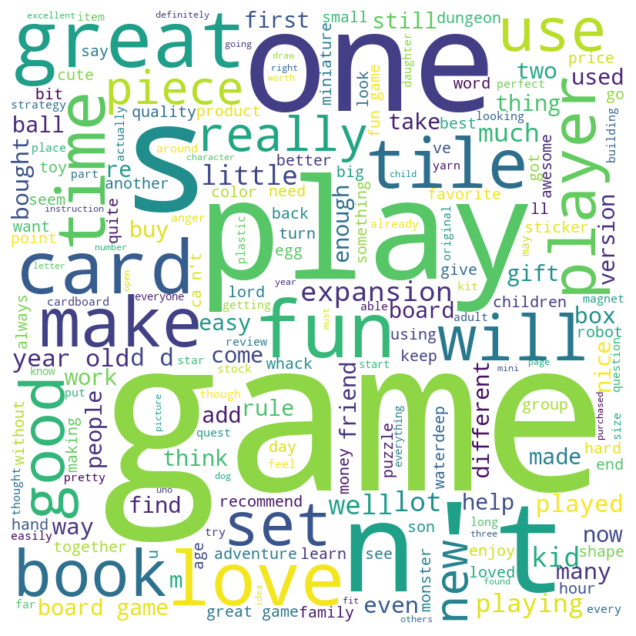

In [40]:
# Create and plot word cloud for review column
wordcloud = WordCloud(width=800, height=800, background_color='white').generate(' '.join(df_tokenized['review']))
plt.figure(figsize=(8,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [41]:
# Import the NLP libraries 

from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk.sentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud


nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aadam\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aadam\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\aadam\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [42]:
# Determine the frequency distribution
fdist = FreqDist(word for review in dfNLP['review'] for word in review)

In [43]:
# Remove alphanumeric characters and stopwords
stop_words = set(stopwords.words('english'))
filtered_words = [word for word in fdist if word.isalpha() and word not in stop_words]

In [44]:
# Create frequency distribution without stopwords
filtered_fdist = FreqDist(filtered_words)

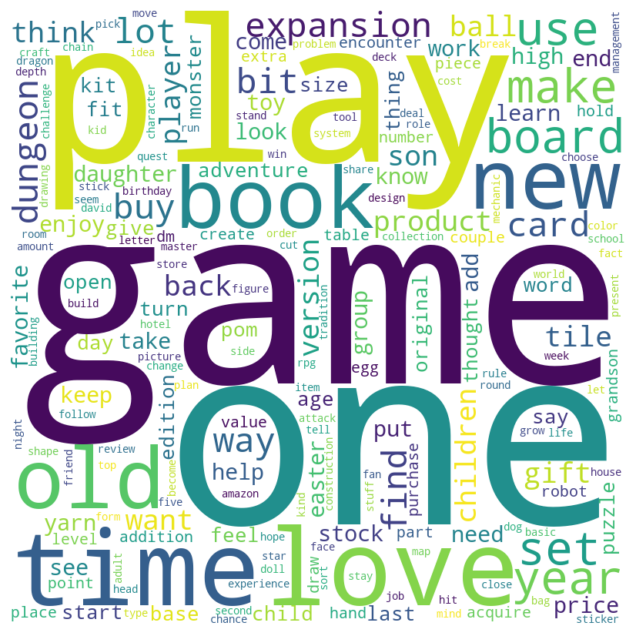

In [45]:
# Create and plot word cloud without stopwords
wordcloud_filtered = WordCloud(width=800, height=800, background_color='white').generate(' '.join(filtered_words))
plt.figure(figsize=(8,8))
plt.imshow(wordcloud_filtered, interpolation='bilinear')
plt.axis('off')
plt.show()

In [46]:
# Create a pie chart to display Customer Sentiment Distrubution 

# Initialize the sentiment analyzer 
sid = SentimentIntensityAnalyzer()

# Function to classify sentiment
def classify_sentiment(sentiment_score):
    if sentiment_score > 0.05:
        return "positive"
    elif sentiment_score < -0.05:
        return "negative"
    else:
        return "neutral"

# Apply sentiment analysis to the combined text
dfNLP['sentiment_score'] = dfNLP['combined_text'].apply(lambda x: sid.polarity_scores(x)['compound'])
dfNLP['sentiment_label'] = dfNLP['sentiment_score'].apply(classify_sentiment)


In [47]:
# Define Variable
sentiment_counts = dfNLP['sentiment_label'].value_counts()


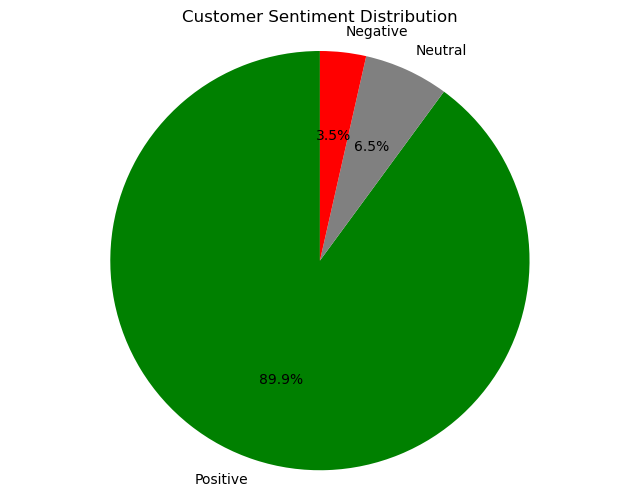

In [48]:
# Set the plot properties
plt.figure(figsize=(8, 6))
colors = ['green', 'gray', 'red']
labels = ['Positive', 'Neutral', 'Negative']

# Create the pie chart
plt.pie(sentiment_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular

# Add title and show the plot
plt.title('Customer Sentiment Distribution')
plt.show()

In [49]:
# Identify the 15 most common words used
most_common_words = filtered_fdist.most_common(15)

# Calculate sentiment polarity for the 15 most common words
sia = SentimentIntensityAnalyzer()
sentiment_polarity = {word: sia.polarity_scores(word)['compound'] for word, _ in most_common_words}

print("Sentiment polarity of the 15 most common words:", sentiment_polarity)

Sentiment polarity of the 15 most common words: {'game': 0.0, 'great': 0.6249, 'fun': 0.5106, 'one': 0.0, 'play': 0.34, 'like': 0.3612, 'love': 0.6369, 'get': 0.0, 'really': 0.0, 'cards': 0.0, 'would': 0.0, 'tiles': 0.0, 'time': 0.0, 'good': 0.4404, 'book': 0.0}


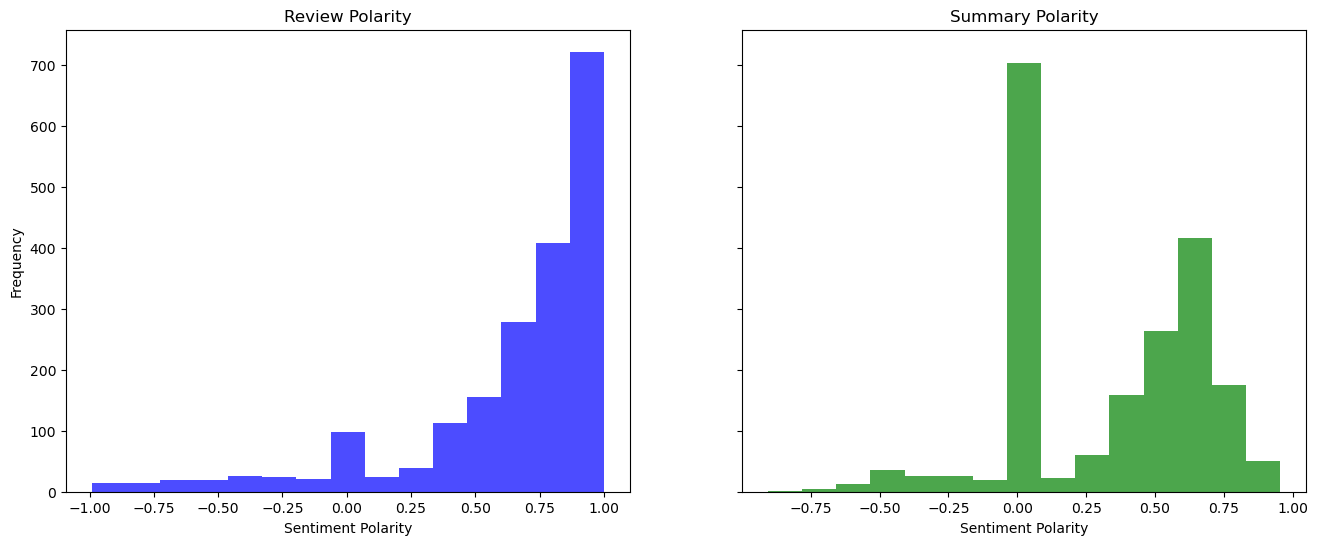

In [50]:
# Calculate sentiment polarity for each review and summary
dfNLP['review_polarity'] = dfNLP['review'].apply(lambda x: sia.polarity_scores(' '.join(x))['compound'])
dfNLP['summary_polarity'] = dfNLP['summary'].apply(lambda x: sia.polarity_scores(' '.join(x))['compound'])

# Plot histograms for sentiment polarity of both columns
fig, axs = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

axs[0].hist(dfNLP['review_polarity'], bins=15, color='blue', alpha=0.7)
axs[0].set_title('Review Polarity')
axs[0].set_xlabel('Sentiment Polarity')
axs[0].set_ylabel('Frequency')

axs[1].hist(dfNLP['summary_polarity'], bins=15, color='green', alpha=0.7)
axs[1].set_title('Summary Polarity')
axs[1].set_xlabel('Sentiment Polarity')

plt.show()

In [51]:
# Review sentiment scores for review column
print("Review sentiment scores:")
print("Mean sentiment polarity:", np.mean(dfNLP['review_polarity']))
print("Median sentiment polarity:", np.median(dfNLP['review_polarity']))
print("Standard deviation of sentiment polarity:", np.std(dfNLP['review_polarity']))

print("\n")

Review sentiment scores:
Mean sentiment polarity: 0.6424067341772162
Median sentiment polarity: 0.7906
Standard deviation of sentiment polarity: 0.40077986332373317




In [52]:
# Review sentiment scores for summary column
print("Summary sentiment scores:")
print("Mean sentiment polarity:", np.mean(dfNLP['summary_polarity']))
print("Median sentiment polarity:", np.median(dfNLP['summary_polarity']))
print("Standard deviation of sentiment polarity:", np.std(dfNLP['summary_polarity']))

Summary sentiment scores:
Mean sentiment polarity: 0.31613493670886145
Median sentiment polarity: 0.4351
Standard deviation of sentiment polarity: 0.3488274988937772


In [53]:
# Sort DataFrame by review and summary polarity
dfNLP_sorted_by_review = dfNLP.sort_values(by=['review_polarity'], ascending=False)
dfNLP_sorted_by_summary = dfNLP.sort_values(by=['summary_polarity'], ascending=False)

# Get the top 20 positive reviews and summaries
top_positive_reviews = dfNLP_sorted_by_review.head(20)
top_positive_summaries = dfNLP_sorted_by_summary.head(20)

# Get the top 20 negative reviews and summaries
top_negative_reviews = dfNLP_sorted_by_review.tail(20)
top_negative_summaries = dfNLP_sorted_by_summary.tail(20)


In [54]:
# Print the top 20 positive reviews and summaries
print("Top 20 Positive Reviews:")
print(top_positive_reviews[['review', 'review_polarity']])
print("\nTop 20 Positive Summaries:")
print(top_positive_summaries[['summary', 'summary_polarity']])

print("\n")

Top 20 Positive Reviews:
                                                 review  review_polarity
1121  [disclaimer, :, bought, this, from, a, local, ...           0.9996
879   [whenever, i, see, this, game, on, my, shelf, ...           0.9995
1666  [if, you, only, employ, one, creativity-enhanc...           0.9993
1570  [as, a, dad, of, two, boys, im, always, on, th...           0.9991
857   [i, grew, up, playing, monopoly, ., lots, of, ...           0.9989
1295  [lords, of, waterdeep, was, awesome, ,, and, s...           0.9988
358   [this, kit, is, awesome, !, my, 5-year, old, d...           0.9988
1357  [lords, of, waterdeep, :, scoundrels, of, skul...           0.9984
1073  [we, own, this, game, as, well, as, castle, ra...           0.9977
928   [wrath, of, ashardalon, gets, everything, righ...           0.9976
836   [i, do, n't, know, if, ive, ever, taken, more,...           0.9976
1063  [if, you, are, a, fan, of, dungeons, and, drag...           0.9973
1116  [the, short, ,, shor

In [60]:
# Print the top 20 negative reviews and summaries
print("Top 20 Negative Reviews:")
print(top_negative_reviews[['review', 'review_polarity']])
print("\nTop 20 Negative Summaries:")
print(top_negative_summaries[['summary', 'summary_polarity']])

Top 20 Negative Reviews:
                                                 review  review_polarity
1019  [great, game, if, you, like, dungeon, crawlers...          -0.7988
852   [firstly, ,, this, game, is, excellent, !, the...          -0.8028
426   [it, 's, uno, with, questions, about, anger, ....          -0.8126
359   [this, is, horrible, !, the, directions, are, ...          -0.8347
1670  [i, thought, i, was, getting, a, new, product,...          -0.8518
506   [its, really, uno, type, game, but, anger, con...          -0.8532
347   [my, 8, year-old, granddaughter, and, i, were,...          -0.8762
1797  [the, ball, of, whacks, can, be, a, valuable, ...          -0.8806
793   [my, mom, already, owned, an, acquire, game, b...          -0.8852
899   [the, game, is, amazing, ., the, new, version,...          -0.8984
882   [a, crappy, cardboard, ghost, of, the, origina...          -0.9052
901   [acquire, is, a, great, game, of, luck, ,, str...          -0.9194
322   [i, am, completely, 

In [61]:
# Analyse the themes in the top 20 reviews using ldaModel 

!pip install spacy
!python -m spacy download en_core_web_sm

import spacy
import gensim
from gensim import corpora
from gensim.models.ldamodel import LdaModel

nlp = spacy.load("en_core_web_sm")

def preprocess_text(text):
    doc = nlp(text)
    tokens = [token.lemma_.lower() for token in doc if not token.is_stop and not token.is_punct]
    return tokens

def prepare_lda_corpus(reviews):
    tokens_list = reviews.apply(preprocess_text)
    dictionary = corpora.Dictionary(tokens_list)
    corpus = [dictionary.doc2bow(tokens) for tokens in tokens_list]
    return corpus, dictionary

def perform_lda(corpus, dictionary, num_topics=5, num_words=5):
    lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=15)
    topics = lda_model.print_topics(num_words=num_words)
    return topics

positive_corpus, positive_dictionary = prepare_lda_corpus(top_positive_reviews['review'].astype(str))
negative_corpus, negative_dictionary = prepare_lda_corpus(top_negative_reviews['review'].astype(str))

print("Topics in top positive reviews:")
print(perform_lda(positive_corpus, positive_dictionary))
print("\nTopics in top negative reviews:")
print(perform_lda(negative_corpus, negative_dictionary))


     -------------------------------------- 12.8/12.8 MB 523.4 kB/s eta 0:00:00
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
Topics in top positive reviews:
[(0, '0.035*"game" + 0.020*"card" + 0.018*"play" + 0.013*"quest" + 0.011*"expansion"'), (1, '0.015*"corporation" + 0.013*"share" + 0.011*"game" + 0.011*"buy" + 0.009*"tile"'), (2, '0.019*"`" + 0.016*"game" + 0.013*"ball" + 0.012*"play" + 0.009*"whack"'), (3, '0.020*"game" + 0.015*"play" + 0.008*"woa" + 0.008*"cr" + 0.007*"time"'), (4, '0.035*"game" + 0.020*"stock" + 0.020*"player" + 0.020*"card" + 0.015*"play"')]

Topics in top negative reviews:
[(0, '0.028*"game" + 0.022*"card" + 0.017*"`" + 0.016*"monster" + 0.014*"player"'), (1, '0.021*"game" + 0.021*"tile" + 0.014*"board" + 0.014*"new" + 0.011*"well"'), (2, '0.014*"game" + 0.014*"get" + 0.011*"piece" + 0.011*"assemble" + 0.011*"figure"'), (3, '0.016*"like" + 0.016*"pain" + 0.013*"game" + 0.011*"box" + 0.011*"play"'), (4,

In [62]:
print("Top 20 Positive Reviews:")
for index, row in top_positive_reviews.iterrows():
    print(f"Review {index}: Polarity {row['review_polarity']}\n{row['review']}\n")

print("Top 20 Negative Reviews:")
for index, row in top_negative_reviews.iterrows():
    print(f"Review {index}: Polarity {row['review_polarity']}\n{row['review']}\n")



Top 20 Positive Reviews:
Review 1121: Polarity 0.9996
['disclaimer', ':', 'bought', 'this', 'from', 'a', 'local', 'store', '.', 'paid', 'list', 'value', ',', 'but', 'supporting', 'local', 'game', 'stores', 'helps', 'keep', 'them', 'in', 'business', ',', 'and', 'it', "'s", 'a', 'rough', 'market', 'to', 'keep', 'a', 'gaming', 'store', 'running', '.', 'also', ',', 'i', 'do', 'not', 'own', ',', 'nor', 'have', 'i', 'played', '&', 'nbsp', ';', '<', 'a', 'data-hook=', "''", 'product-link-linked', "''", 'class=', "''", 'a-link-normal', "''", 'href=', "''", '/dungeons-dragons-castle-ravenloft-board-game/dp/0786955570/ref=cm_cr_arp_d_rvw_txt', '?', 'ie=utf8', "''", '>', 'dungeons', '&', 'dragons', ':', 'castle', 'ravenloft', 'board', 'game', '<', '/a', '>', ',', 'the', 'first', 'd', '&', 'd', 'adventures', 'board', 'game', '.', 'regardless', '...', 'dungeons', '&', 'dragons', ':', 'wrath', 'of', 'ashardalon', 'board', 'game', '(', 'woa', ')', 'is', 'a', 'fantastic', 'value', 'at', '$', '65', '('

In [68]:
# Decided to manually code the reviews using excel instead as I cannot garner much from the ldaModel 

In [69]:
# Import manual code 
df = pd.read_csv('top_positive_reviews_coded.csv')


In [70]:
# The manual code insights are as follows 
# engaging 	18
# Value for money	4
# accessible	4
# good build quality	4



In [71]:
# plot a chart of this data 

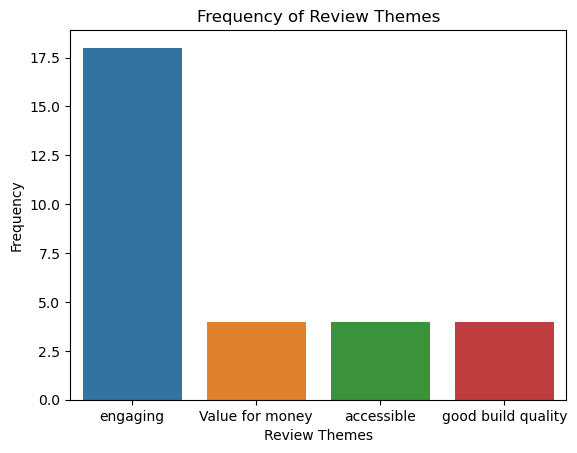

In [72]:
# Data to plot
data = {'engaging': 18, 'Value for money': 4, 'accessible': 4, 'good build quality': 4}

# Create a bar plot
sns.barplot(x=list(data.keys()), y=list(data.values()))

# Set labels and title
plt.xlabel('Review Themes')
plt.ylabel('Frequency')
plt.title('Frequency of Review Themes')

# Show the plot
plt.show()

Analysis- It was determined that the majority of the reviews had a high sentiment polarity score, the mean was 0.64. Therefore, indicating favourable perceptions of the product range. The top 20 reviews by positive sentiment were manually coded to determine common themes. Manual code was utilised as human coding can better understand ambiguous or nuance languages in reviews. For example, concepts such as sarcasm. The common themes emphasised in the reviews were fun, build quality, accessibility and value for money. In future marketing campaigns, we could highlight these factors in communication to entice and engage customers and ultimately lead to greater sales conversion.